## Deep Learning

The mathematical challenge for an artificial neural network is to best optimize thousands or millions or whatever number of weights you have such that the output layer results in what you were looking for. Solving for this problem, and building out the layers of our neural network model is exactly what TensorFlow is for. TensorFlow is used for all things "operations on tensors." A tensor in this case is nothing fancy; it's a multi-dimensional array.

Following the release of deep learning libraries, higher-level API-like libraries came out, which sit on top of the deep learning libraries like TensorFlow and make building, testing, and tweaking models even more simple. One such library that has easily become the most popular is Keras.

In [45]:
import tensorflow as tf
import matplotlib.pyplot as plt

tf.__version__

'2.9.1'

To start off, we can look at a common example for deep learning using the MNIST dataset. This dataset consists of 28x28 images of handwritten digits, from 0 to 9. Our goal is to use TensorFlow and Keras to build a model that can accurately recognize these images upon receiving them as input.

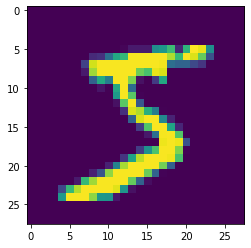

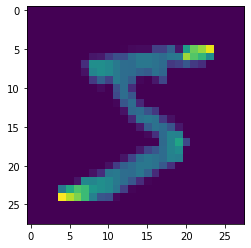

In [46]:
## Initialize MNIST data set (28x28 handwritten digit images)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0])
plt.show()

## We can normalize the pixel values in the training / test set to be between 0-1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

plt.imshow(x_train[0])
plt.show()

Now, we can build our model using Keras' sequential model function; this is basically a feed-forward model that is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. Our neural network will have two hidden layers (with ReLU activation function) and an output layer with 10 neurons (each mapping to output digit from 0-9). In the output layer, the activation function used is the softmax function as we are looking at more of a probability distribution.

In [47]:
## Establish our Sequential model here
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

## Set up some parameters for our model
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2684 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1125 - accuracy: 0.9655
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0768 - accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0552 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0432 - accuracy: 0.9858


As we train our model through multiple iterations, we can see our loss metric (calculation for error) decrease substantially and accuracy improves from 92.2% to 98.6%. We should also simulate this on our test data to make sure our model didn't simply memorize every single example in the training data (overfitting).

In [16]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print("The value of the loss is: ", val_loss)
print("The accuracy of the model is: ", val_accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.0987 - accuracy: 0.9717
The value of the loss is:  0.09874707460403442
The accuracy of the model is:  0.9717000126838684


As we can see, we get similar values of loss and accuracy (97%) when simulating our model on our test (out-of-sample) data, so this means our model has learned to classify MNIST digits in general. We can now output this list of classifications in a Pandas dataframe and export it to CSV for our records.

313/313 [==============================] - 0s 1ms/step
[[5.4827341e-11 1.2298217e-09 2.3392664e-07 ... 9.9999893e-01
  1.2896800e-10 3.0892544e-09]
 [1.2936729e-13 1.8514701e-08 1.0000000e+00 ... 2.3451755e-14
  7.2766472e-12 1.1244363e-17]
 [2.5937792e-09 9.9992490e-01 1.3264461e-06 ... 5.5877346e-05
  8.4156472e-06 1.2707464e-07]
 ...
 [3.9115794e-10 4.5939746e-07 6.3848843e-10 ... 1.2307581e-06
  6.5333758e-08 6.5592001e-05]
 [1.3902446e-09 3.3152533e-10 3.1800265e-09 ... 3.2777081e-08
  1.5525375e-05 8.7092982e-09]
 [6.7521988e-11 3.9380547e-12 3.5490066e-12 ... 1.4573533e-13
  5.5674811e-09 1.5226248e-13]]


7


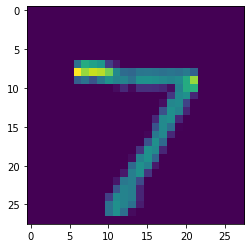

2


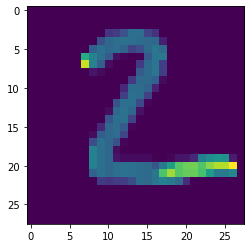

1


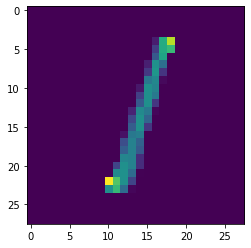

0


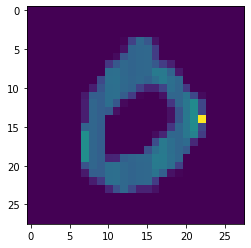

In [49]:
predictions = model.predict(x_test)
print(predictions)
print('\n')

## We can check the first few using plt.imshow
print(np.argmax(predictions[0]))
plt.imshow(x_test[0])
plt.show()

print(np.argmax(predictions[1]))
plt.imshow(x_test[1])
plt.show()

print(np.argmax(predictions[2]))
plt.imshow(x_test[2])
plt.show()

print(np.argmax(predictions[3]))
plt.imshow(x_test[3])
plt.show()

In [50]:
import pandas as pd
import numpy as np

preds = pd.DataFrame([np.argmax(predictions[i]) for i in range(0, 10000)])
preds.columns = ['Predictions']
preds.to_csv('predictions_mnist.txt', index=False, header=False)
print(preds)

      Predictions
0               7
1               2
2               1
3               0
4               4
...           ...
9995            2
9996            3
9997            4
9998            5
9999            6

[10000 rows x 1 columns]
